In [1]:
import os
os.chdir(os.getcwd()+'/../')
print(os.getcwd())

/home/kyriakos/workspace/reasearch/RIS/deep_RIS_scattering



The dataset includes data for three different reverberation times (in other words, how lossy is the environment, how often does the wave bounce around before being absorbed) and three different scattering strengths of the dynamic perturber. Each time, the transmission between a pair of antennas (fixed position) is measured at 30 frequency points for 500 random RIS configurations, and 100 random perturber realizations. We can adjust the simulation setup and/or produce more data if needed but hopefully the attached dataset is a good starting point. We haven't taken a closer look at the dataset so far.

The variables in the filenames, $qq$ and $ll$, identify reverberation time ($qq=1$ largest, $qq=3$ lowest) and perturber size ($ll=1$ smallest, $ll=3$ largest). Within each file are the following variables:

- $L pert$       is the perturber size (length).
- $PertOrient$   is the angular orientation of the perturber for each transmission measurement.
- $RIS configs$  contains the binary configuration of the 21 element RIS for each transmission measurement.
- $freq$         is the 30-element frequency vector (in arbitrary units, the central frequency is 1).
- $Transmission$ are the S12 measurements between TX and RX for the 30 frequencies for 100 random perturber realizations and 500 random RIS configurations.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import scipy.io
import matplotlib.colors

In [3]:
DATA_DIR        = './data/summary/'
FILENAME_FORMAT = DATA_DIR + 'SUMMARY qq={:d} ll={:d}.mat'
QQ_VALUES       = [1,2,3]
LL_VALUES       = [1,2,3]

LL = 1
QQ = 3

In [4]:
filename = FILENAME_FORMAT.format(LL,QQ)
mat = scipy.io.loadmat(filename)
del mat['__header__']
del mat['__version__']
del mat['__globals__']

print("MAT file contains:")
for key, val in mat.items():
    print("{:<15} : {}".format(key, type(val)))

MAT file contains:
L_pert          : <class 'numpy.ndarray'>
PertOrient      : <class 'numpy.ndarray'>
RIS_configs     : <class 'numpy.ndarray'>
Transmission    : <class 'numpy.ndarray'>
freq            : <class 'numpy.ndarray'>


In [5]:
L_pert       = mat['L_pert'][0,0]
PertOrient   = mat['PertOrient']
RIS_configs  = mat['RIS_configs']
Transmission = mat['Transmission']
freq         = mat['freq'].flatten()

In [6]:
L_pert

4

In [7]:
PertOrient.shape

(100, 500)

In [8]:
RIS_configs.shape

(100, 500, 21)

In [9]:
Transmission.shape

(100, 500, 30)

In [10]:
Transmission.imag.min()

-0.9696373142462007

In [11]:
freq.shape

(30,)

In [12]:
RIS_configs[:,0,0]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [13]:
np.unique(RIS_configs)

array([0, 1], dtype=uint8)

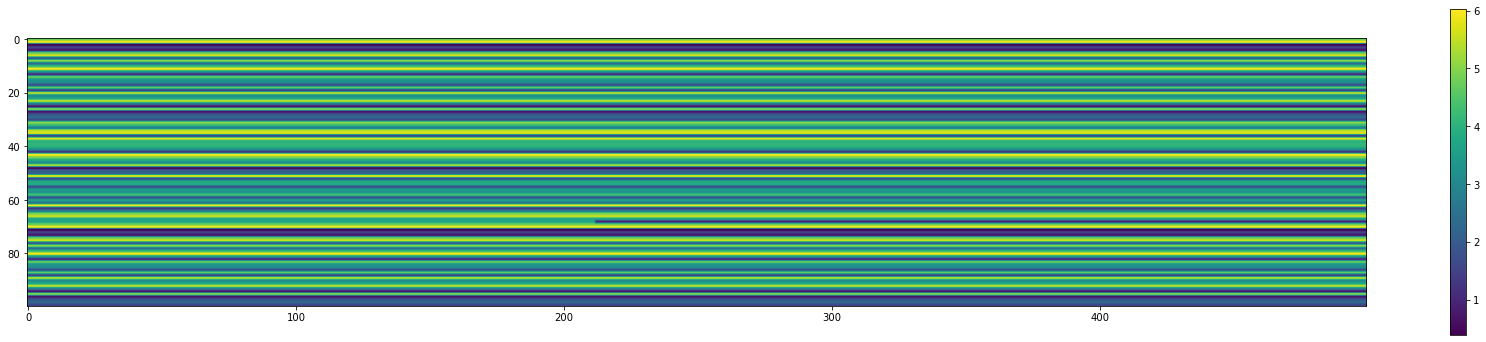

In [14]:
plt.figure(figsize=(30,6))
im = plt.imshow(PertOrient)
plt.colorbar(im)
plt.show()

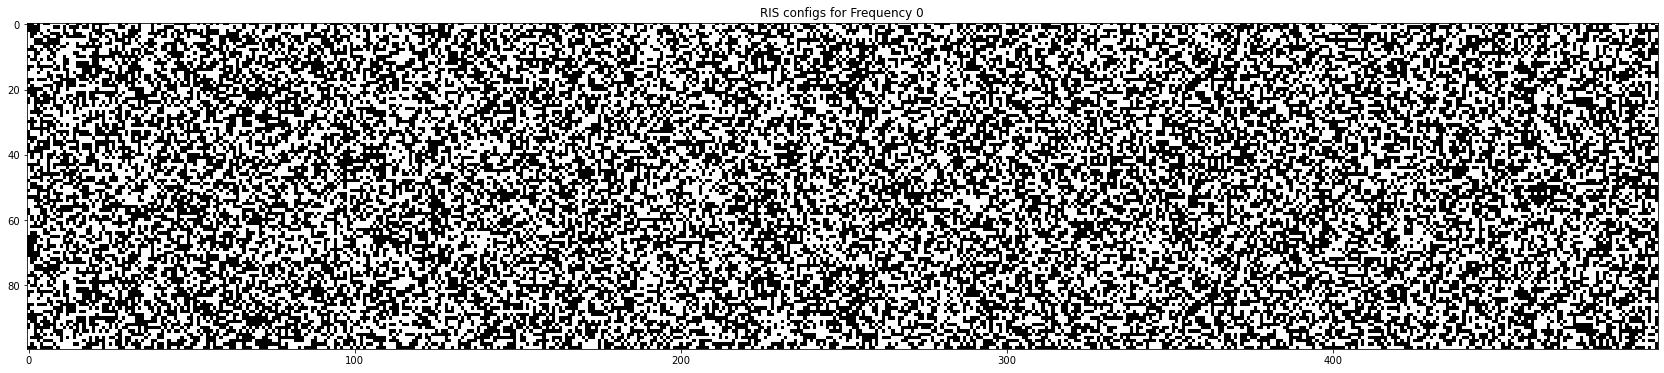

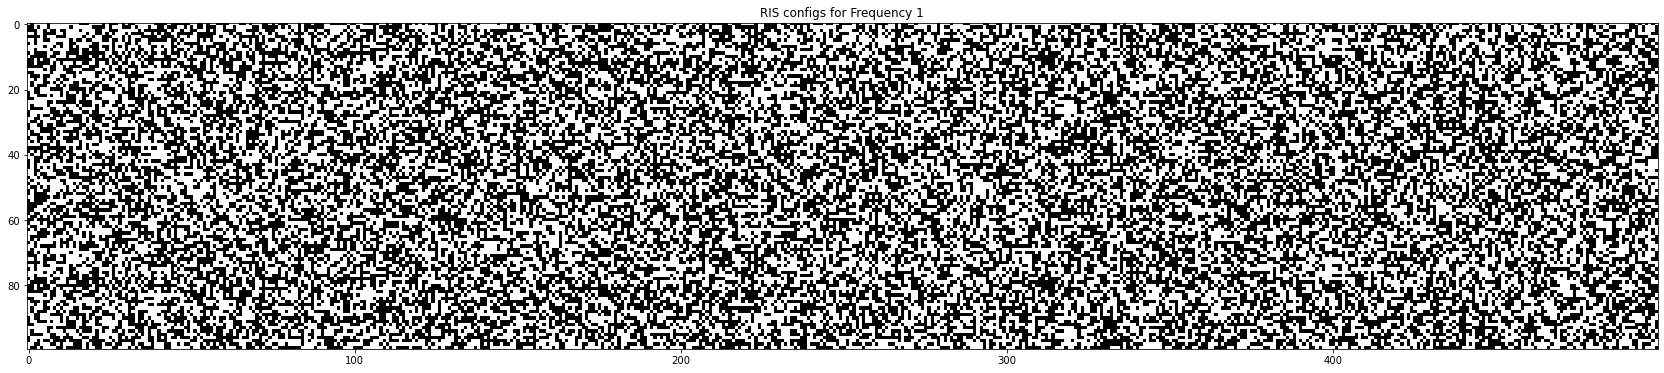

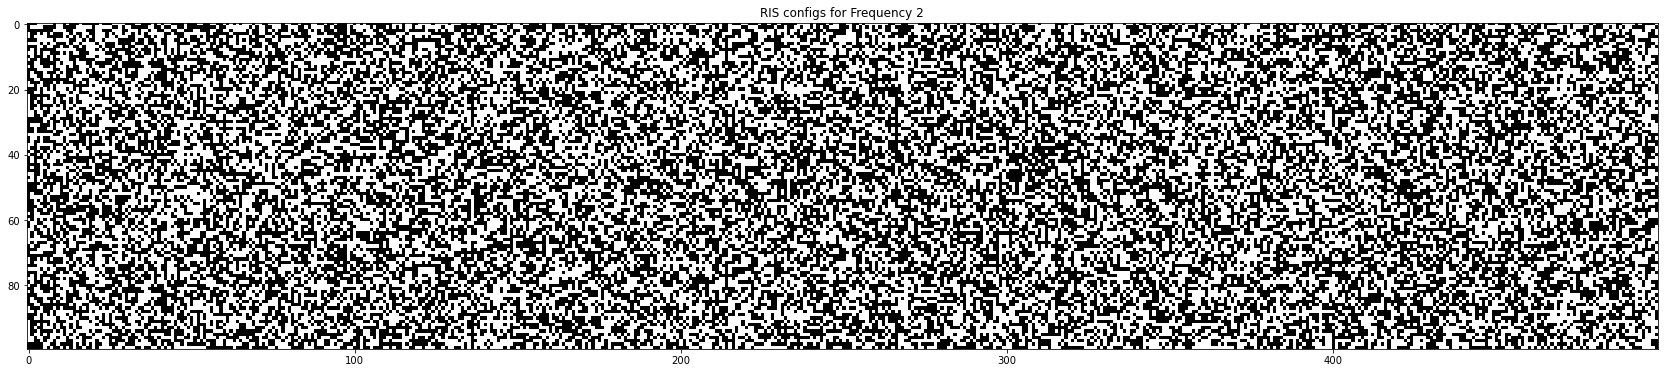

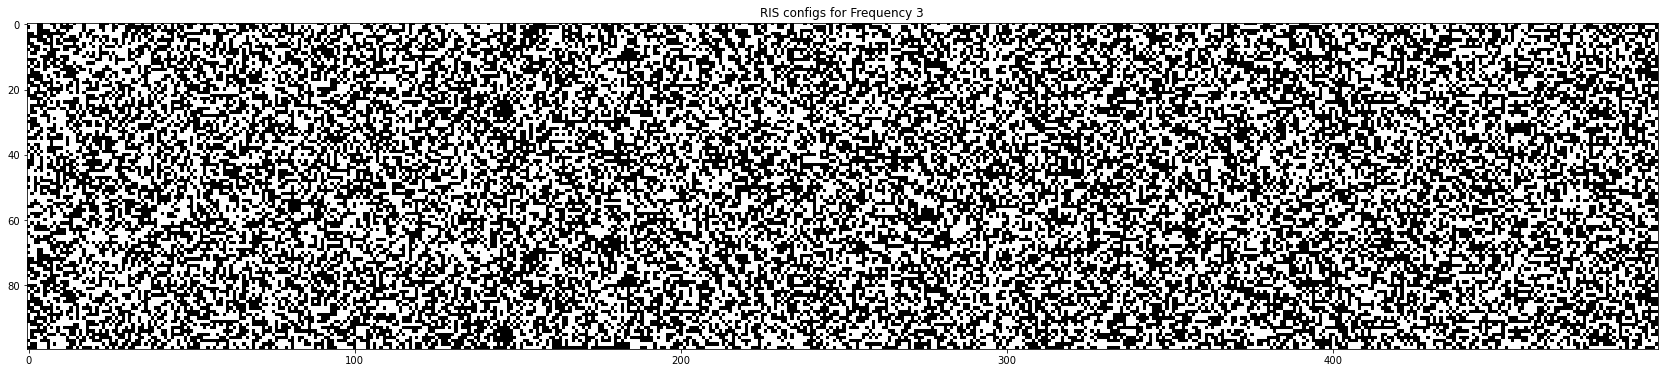

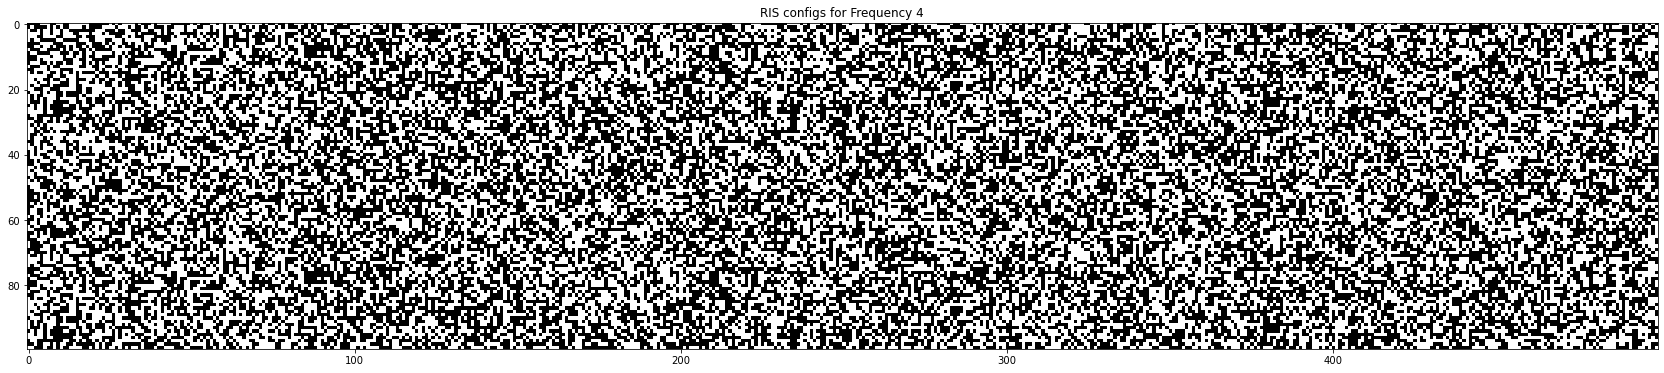

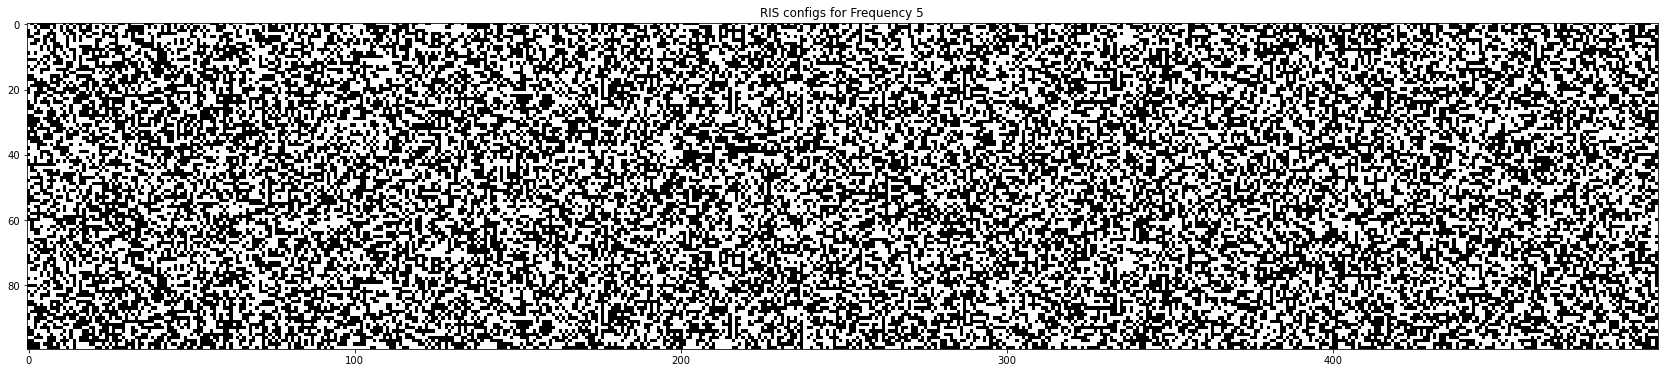

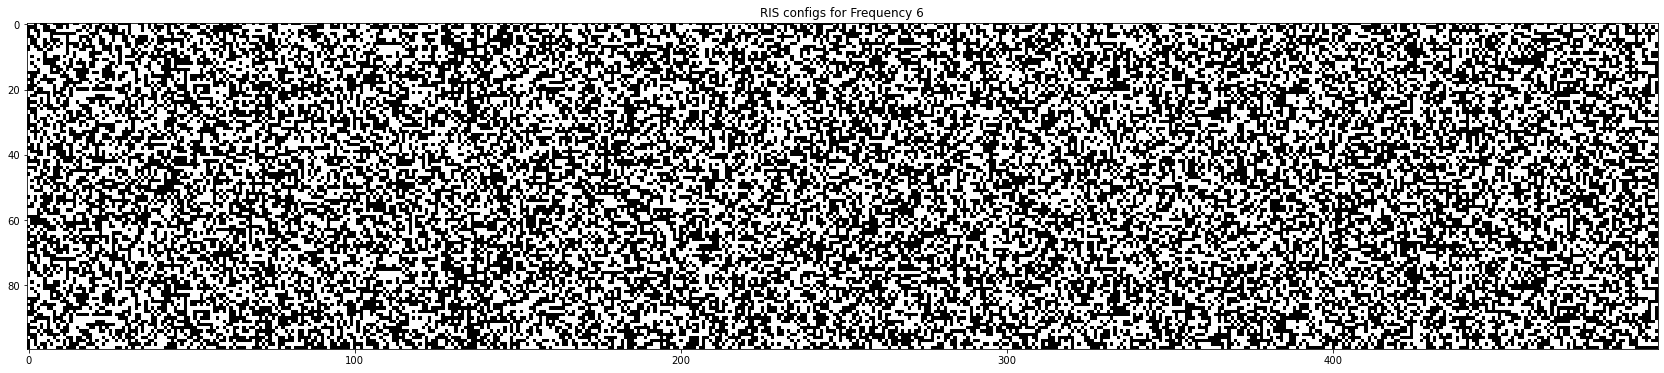

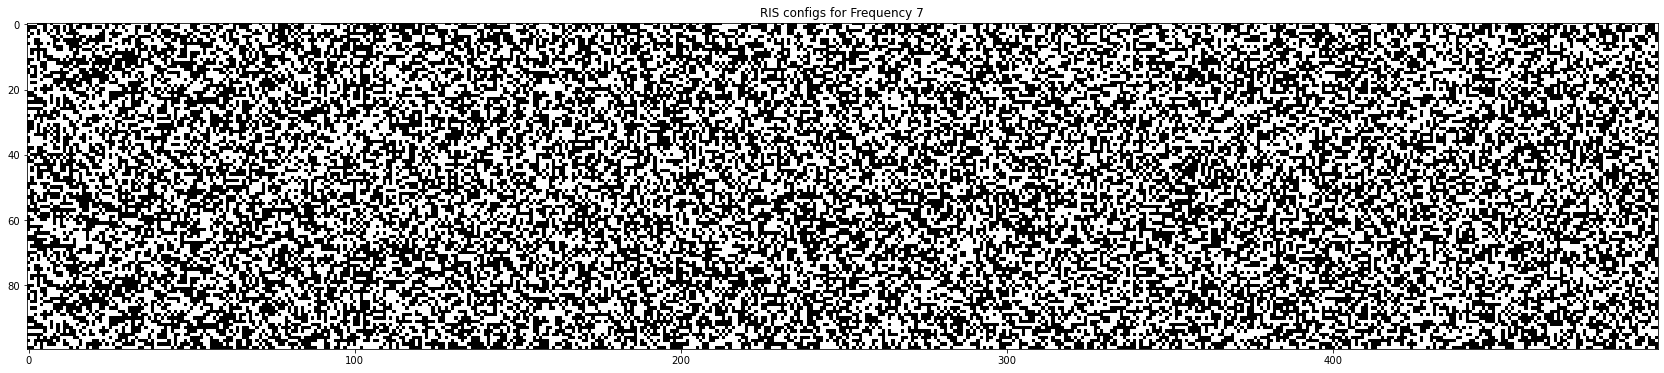

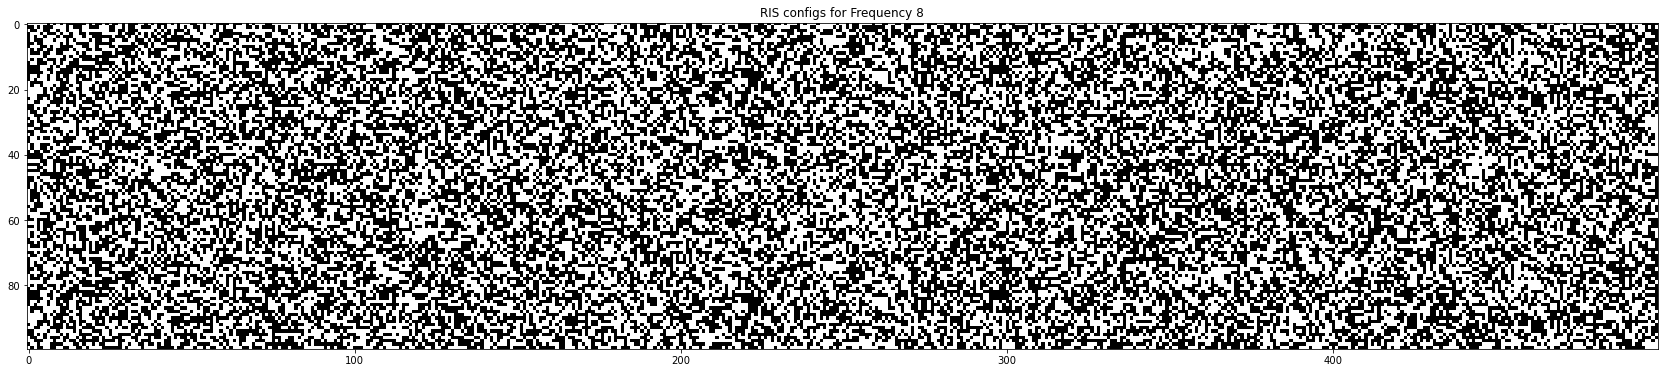

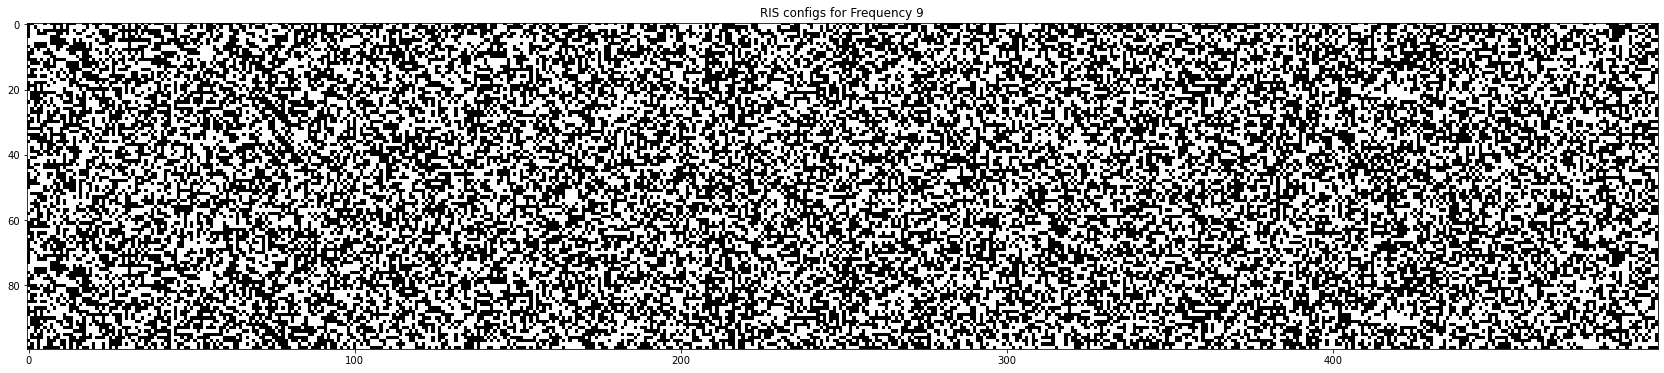

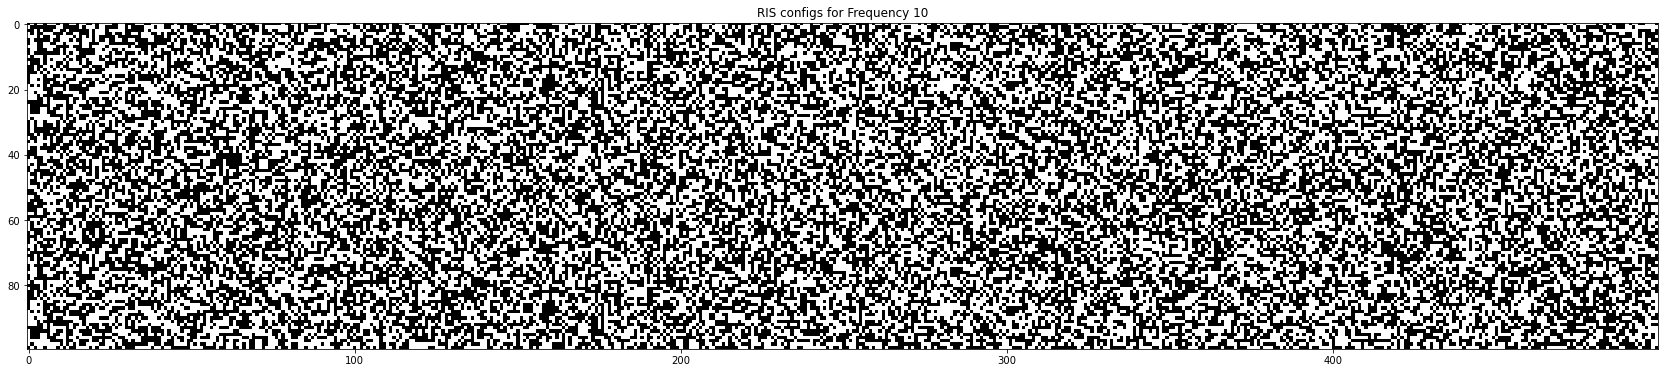

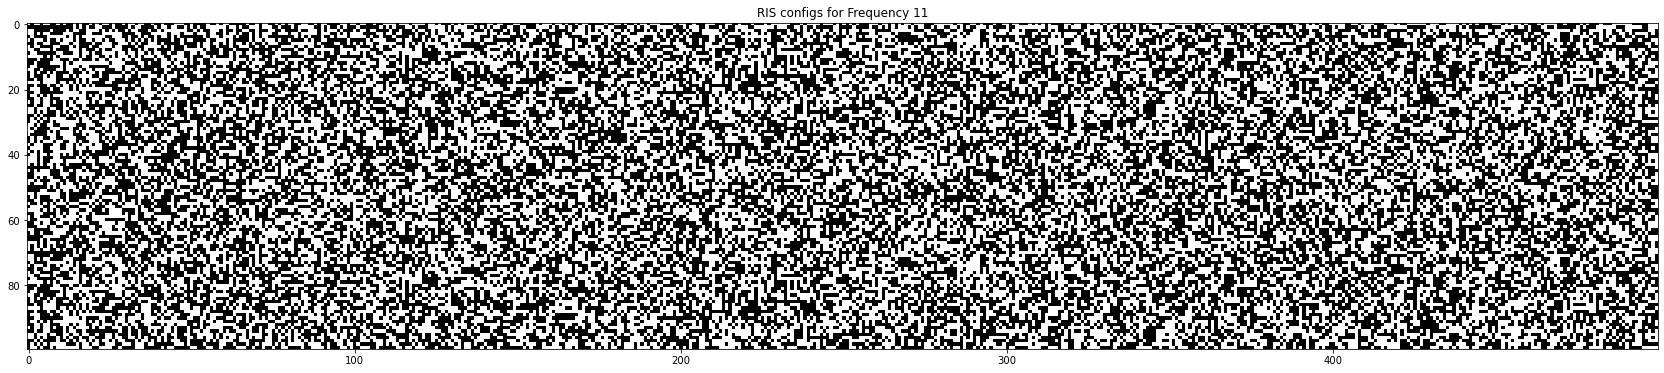

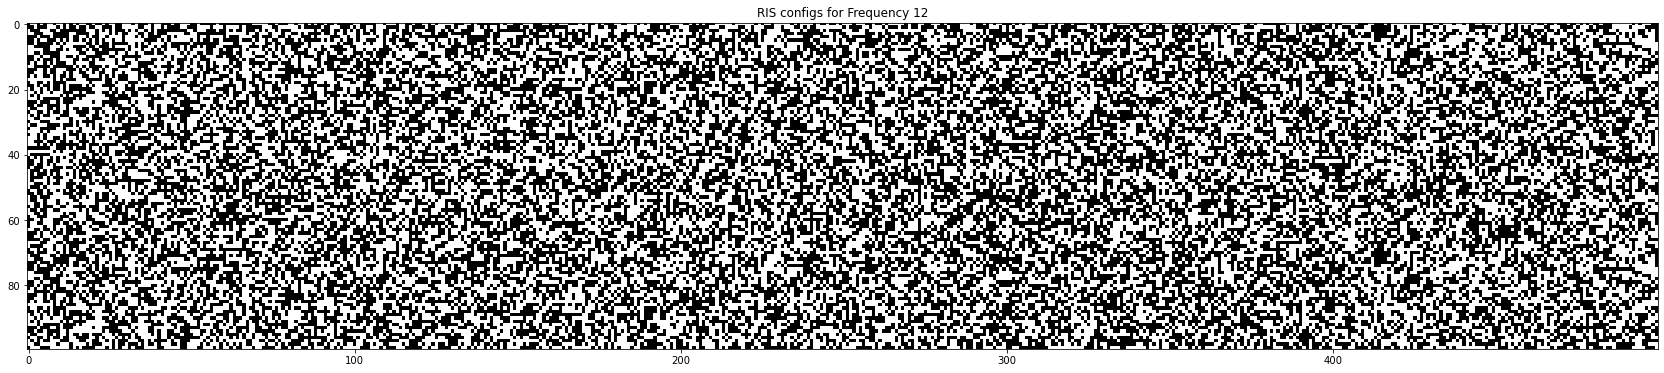

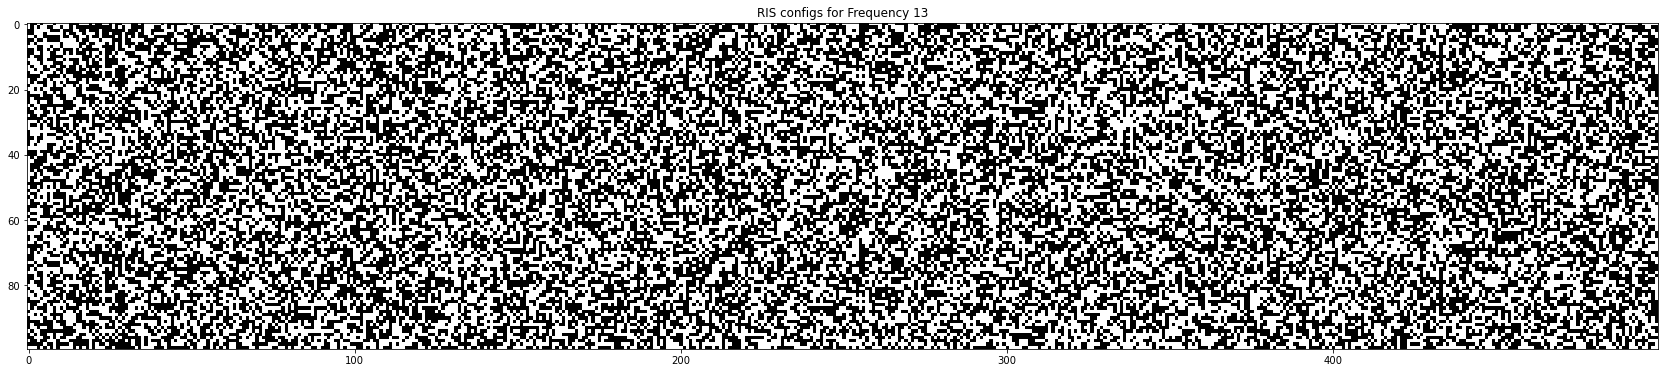

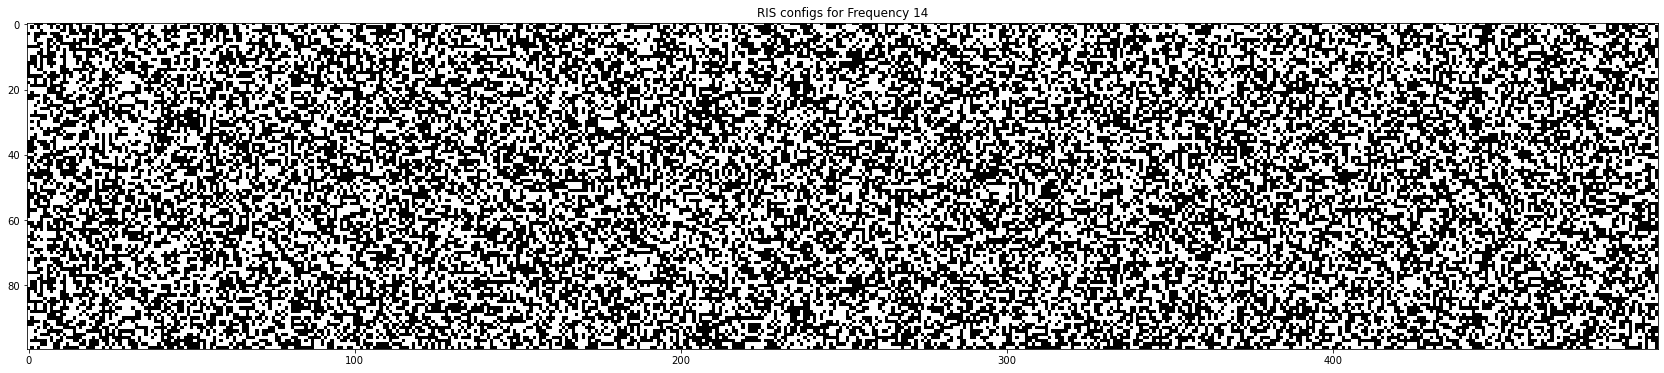

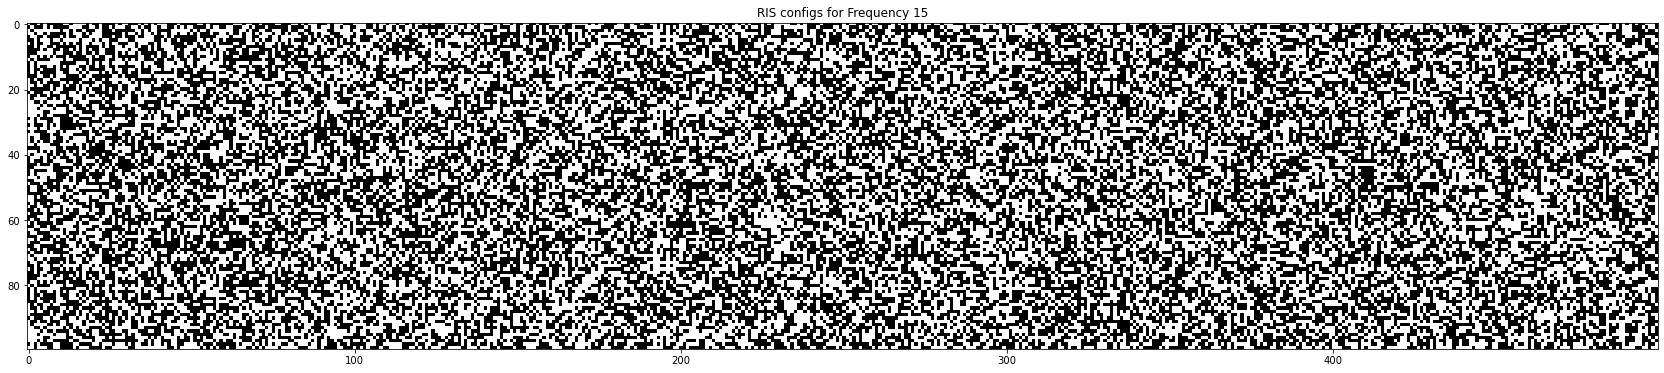

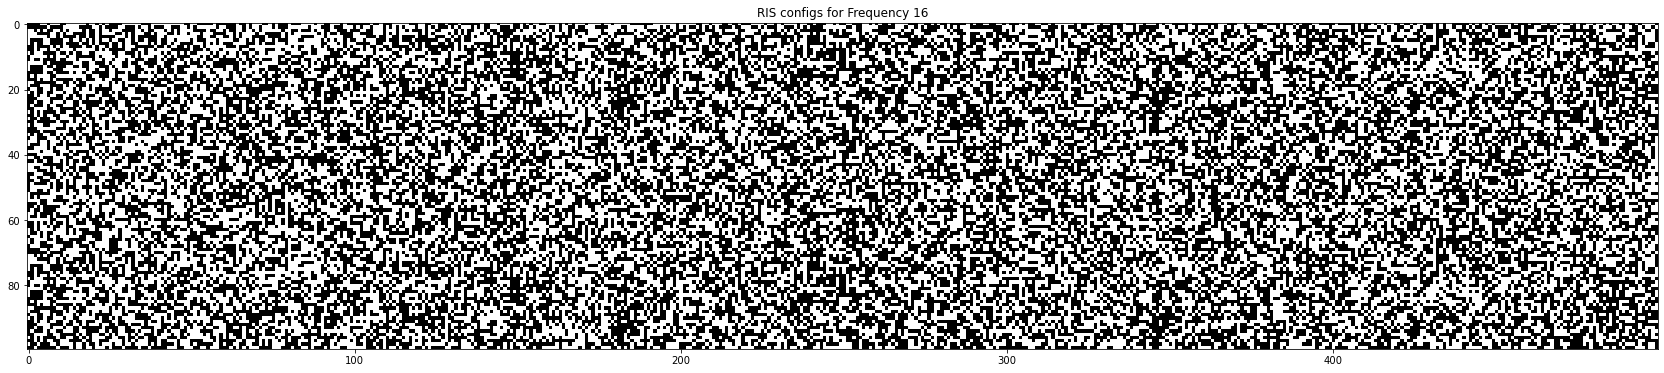

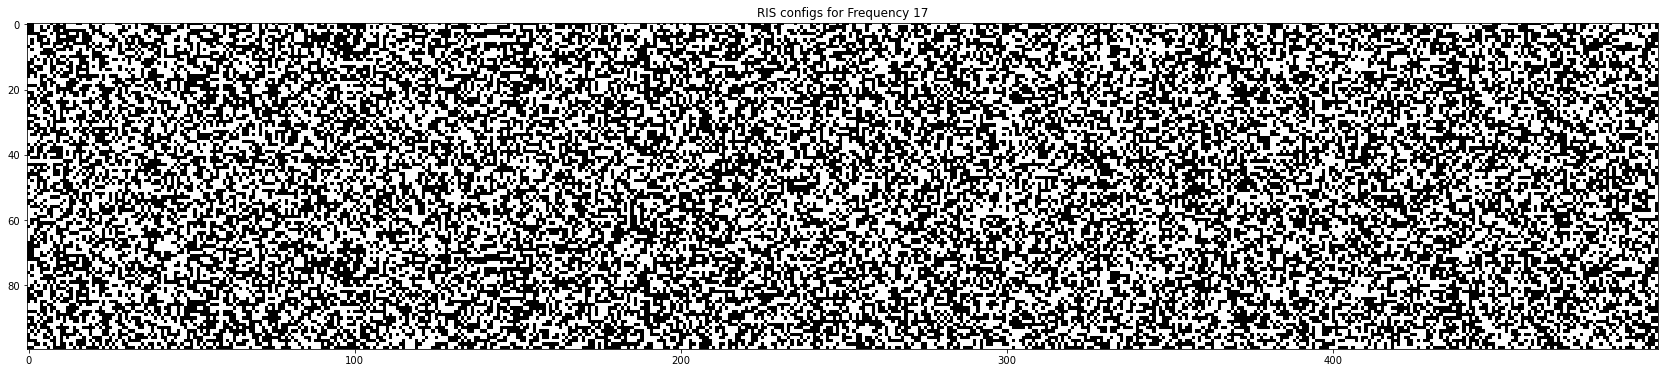

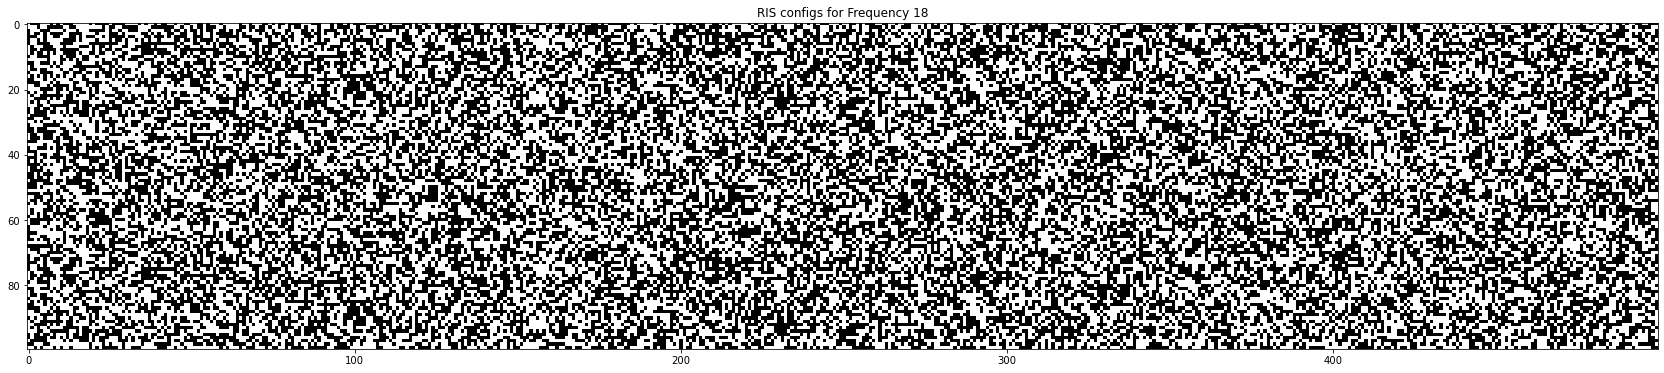

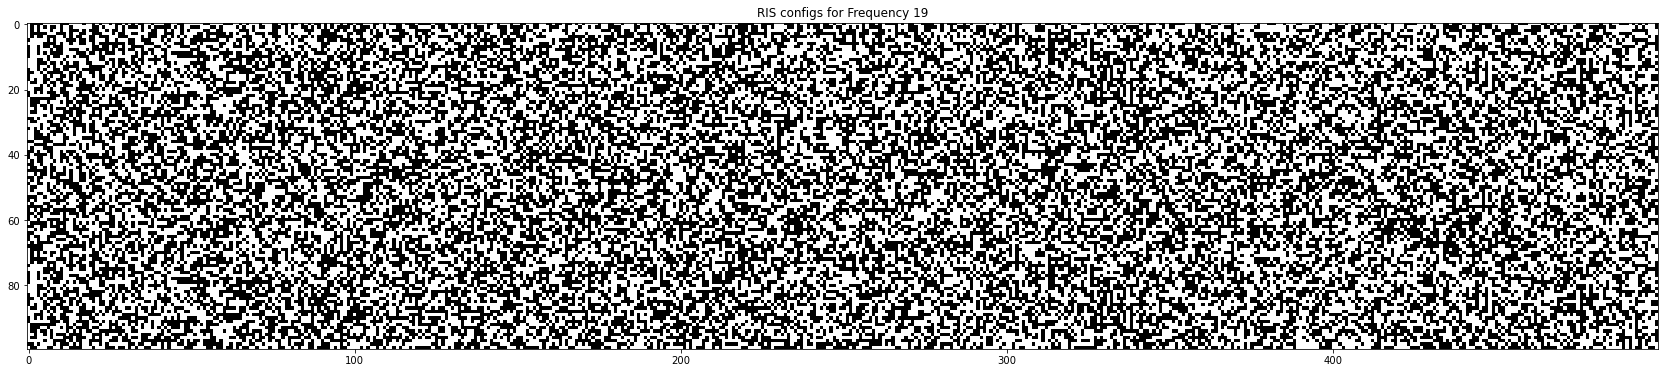

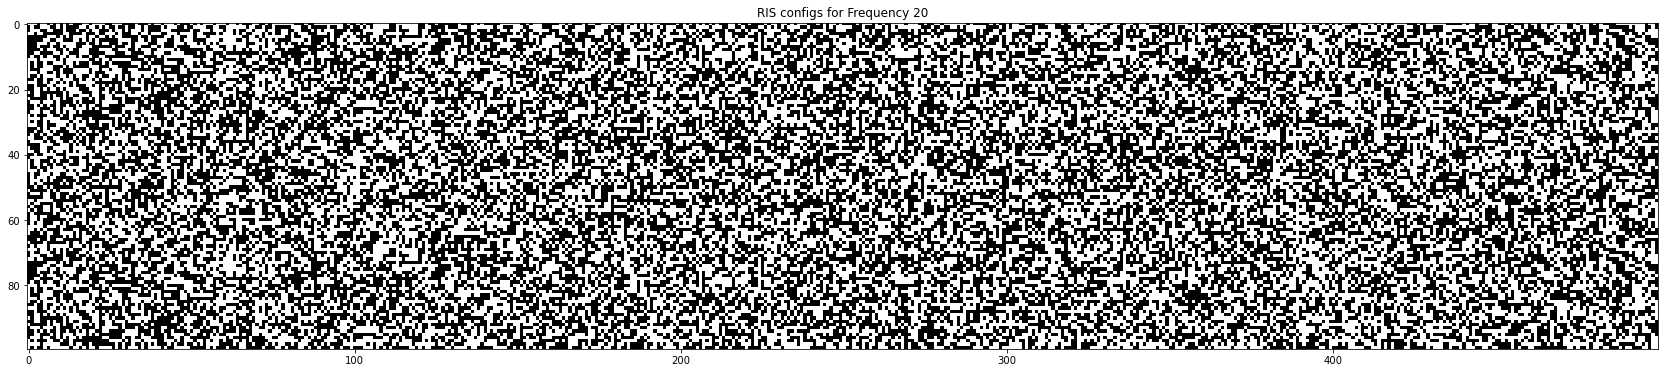

In [15]:
cmap = matplotlib.colors.ListedColormap(['white', 'black'])

for i in range(RIS_configs.shape[2]):

    plt.figure(figsize=(30,6))
    im = plt.imshow(RIS_configs[:,:,i], cmap=cmap)
    #plt.colorbar(im)
    plt.title(f"RIS configs for Frequency {i}")
    plt.show()

In [ ]:
np.sum(RIS_configs[:,:,0] - RIS_configs[:,:,1])

In [ ]:
for t in range(30):
    plt.figure(figsize=(20,4))
    im = plt.imshow(Transmission[:,:,t].real, vmin=-1, vmax=1)
    plt.colorbar(im)
    plt.title(f'Frequency {t} (Real part)')
    plt.show()
    
    plt.figure(figsize=(20,4))
    im = plt.imshow(Transmission[:,:,t].imag, vmin=-1, vmax=1)
    plt.colorbar(im)
    plt.title(f'Frequency {t} (Imaginary part)')
    plt.show()

In [ ]:
np.std(Transmission[:,:,20].real, axis=1)

In [14]:
X = np.empty(shape=(100*500*9, 21+4))
y = np.empty(shape=(100*500*9, 30*2))




i=0
s = 100*500

for qq in QQ_VALUES:
    for ll in LL_VALUES:
        
        mat          = scipy.io.loadmat(FILENAME_FORMAT.format(ll,qq))
        L_pert       = mat['L_pert'][0,0]
        PertOrient   = mat['PertOrient']
        RIS_configs  = mat['RIS_configs']
        Transmission = mat['Transmission']
        freq         = mat['freq'].flatten()
        
        X[i*s:(i+1)*s, 0:21] = RIS_configs.reshape((-1,21))
        X[i*s:(i+1)*s, -4]   = PertOrient.flatten()
        X[i*s:(i+1)*s, -3]   = L_pert
        X[i*s:(i+1)*s, -2]   = qq
        X[i*s:(i+1)*s, -1]   = ll
        
        #print(i*s, (i+1)*s, y[i*s:(i+1)*s, 0:30].shape)
        
        y[i*s:(i+1)*s, 0:30] = Transmission.reshape((-1,30)).real
        y[i*s:(i+1)*s, 30:]  = Transmission.reshape((-1,30)).imag
        
        i += 1

<Figure size 432x288 with 0 Axes>

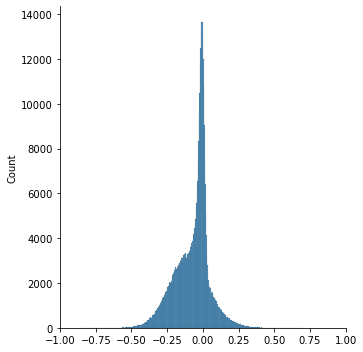

<Figure size 432x288 with 0 Axes>

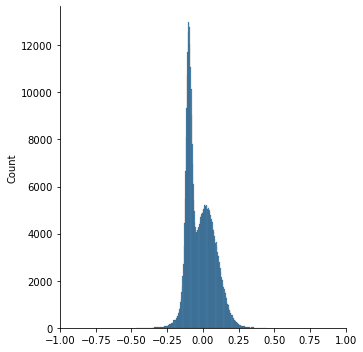

<Figure size 432x288 with 0 Axes>

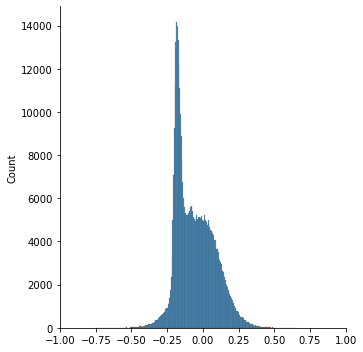

<Figure size 432x288 with 0 Axes>

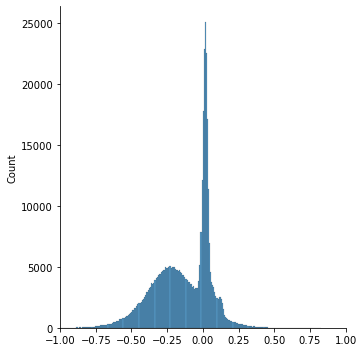

<Figure size 432x288 with 0 Axes>

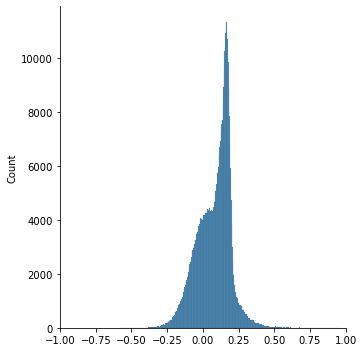

<Figure size 432x288 with 0 Axes>

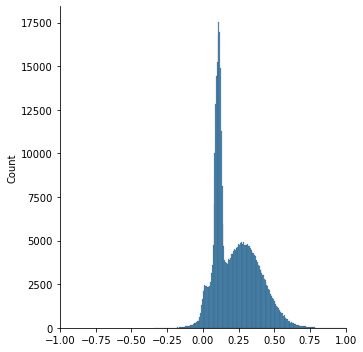

<Figure size 432x288 with 0 Axes>

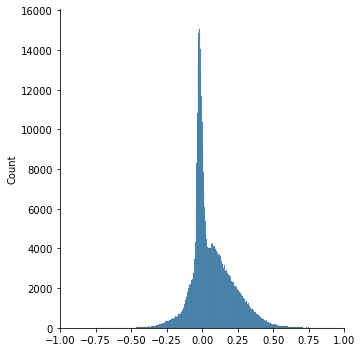

<Figure size 432x288 with 0 Axes>

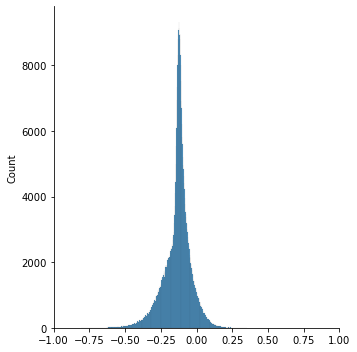

<Figure size 432x288 with 0 Axes>

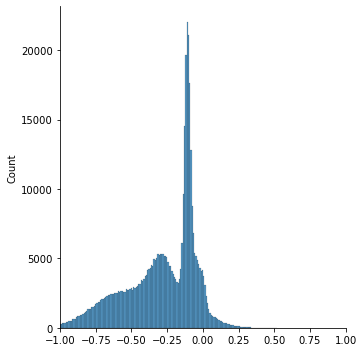

<Figure size 432x288 with 0 Axes>

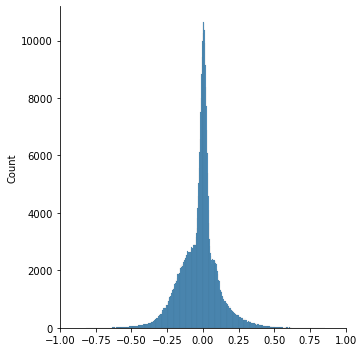

<Figure size 432x288 with 0 Axes>

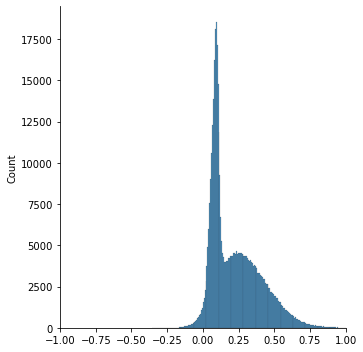

<Figure size 432x288 with 0 Axes>

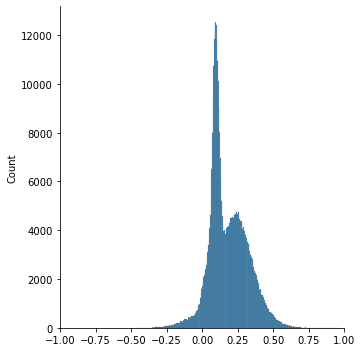

<Figure size 432x288 with 0 Axes>

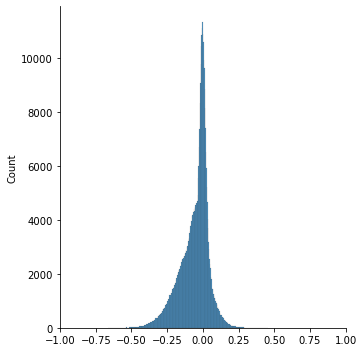

<Figure size 432x288 with 0 Axes>

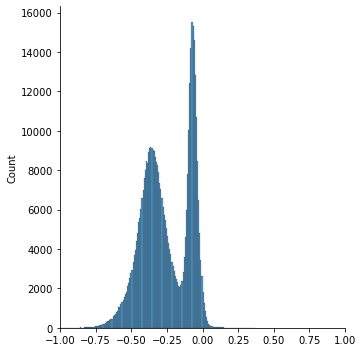

<Figure size 432x288 with 0 Axes>

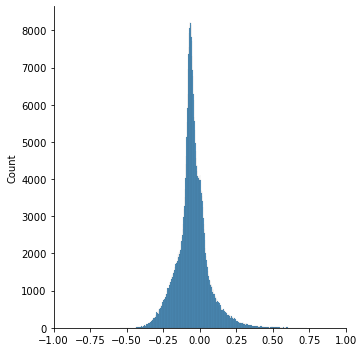

<Figure size 432x288 with 0 Axes>

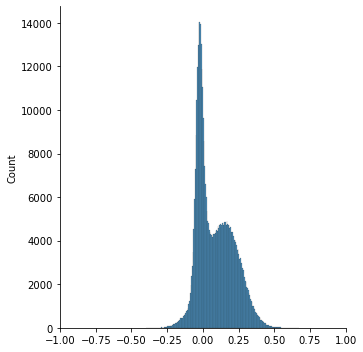

<Figure size 432x288 with 0 Axes>

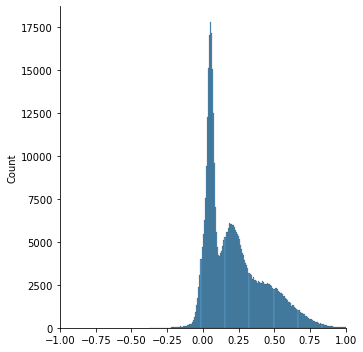

<Figure size 432x288 with 0 Axes>

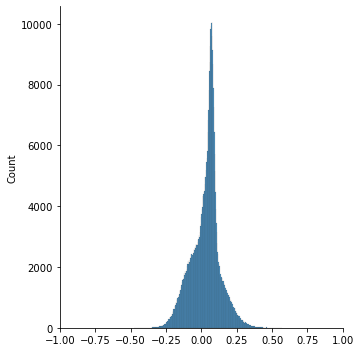

<Figure size 432x288 with 0 Axes>

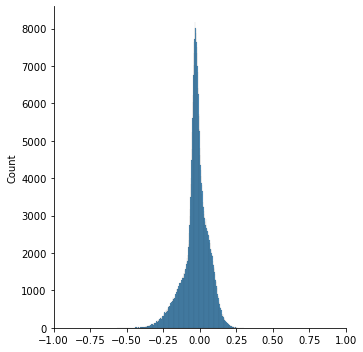

<Figure size 432x288 with 0 Axes>

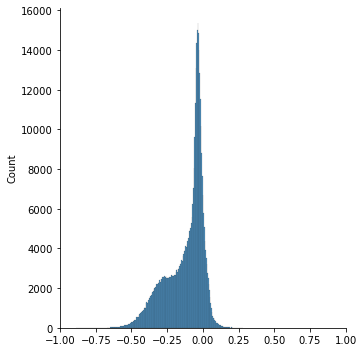

<Figure size 432x288 with 0 Axes>

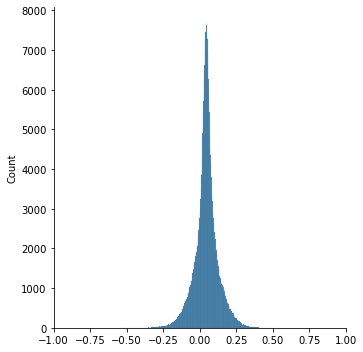

<Figure size 432x288 with 0 Axes>

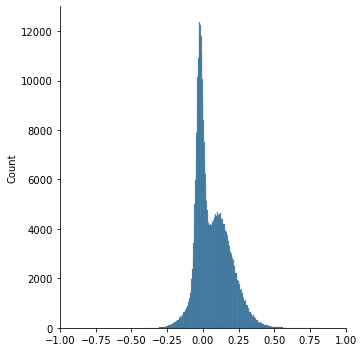

<Figure size 432x288 with 0 Axes>

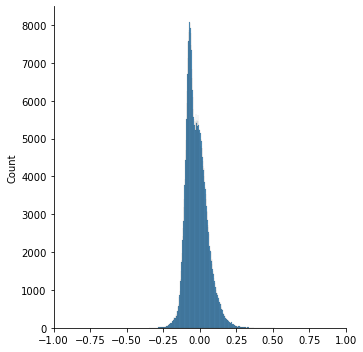

<Figure size 432x288 with 0 Axes>

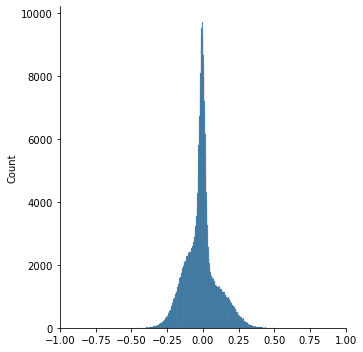

<Figure size 432x288 with 0 Axes>

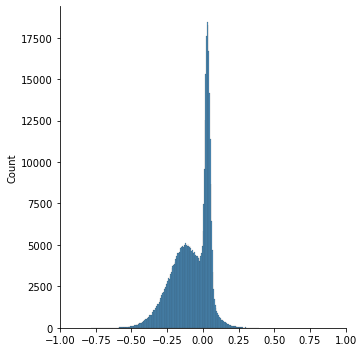

<Figure size 432x288 with 0 Axes>

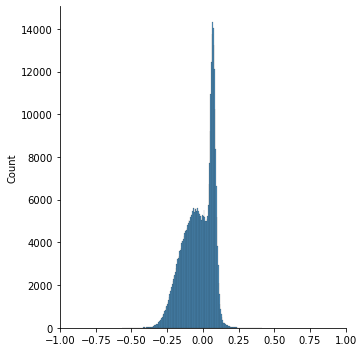

<Figure size 432x288 with 0 Axes>

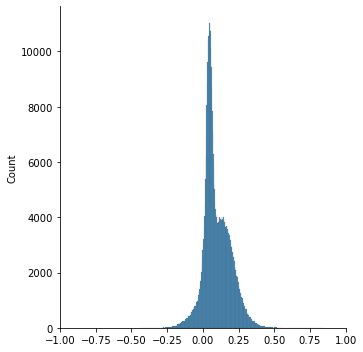

<Figure size 432x288 with 0 Axes>

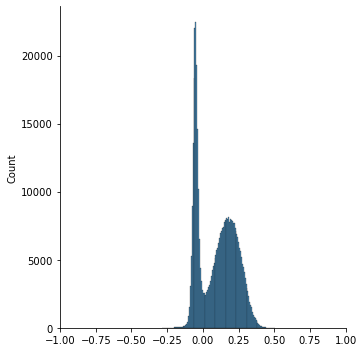

<Figure size 432x288 with 0 Axes>

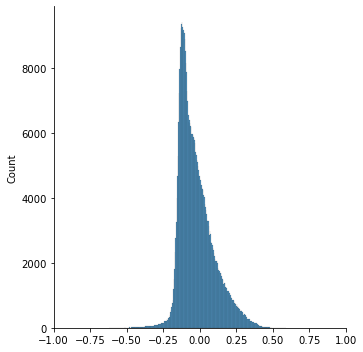

<Figure size 432x288 with 0 Axes>

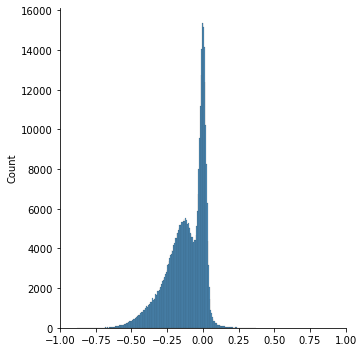

<Figure size 432x288 with 0 Axes>

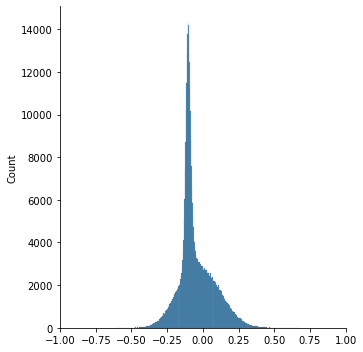

<Figure size 432x288 with 0 Axes>

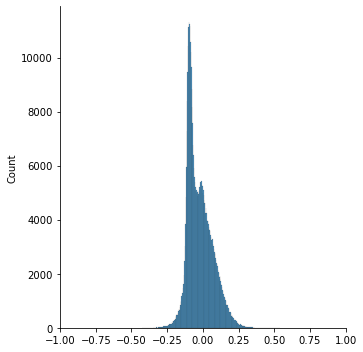

<Figure size 432x288 with 0 Axes>

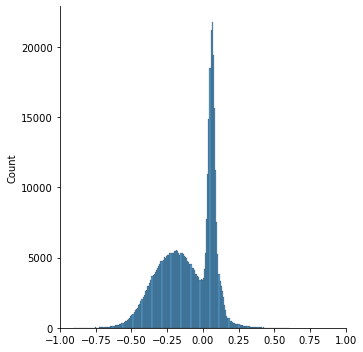

<Figure size 432x288 with 0 Axes>

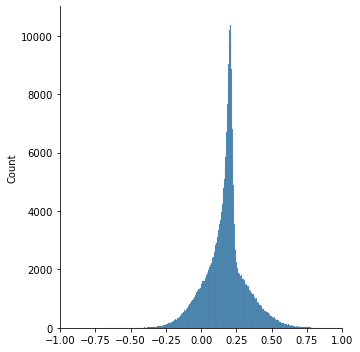

<Figure size 432x288 with 0 Axes>

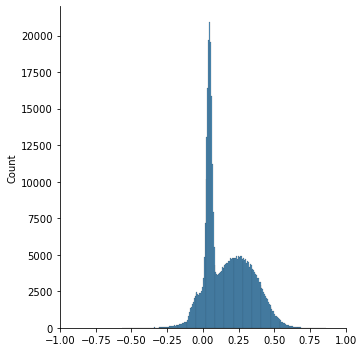

<Figure size 432x288 with 0 Axes>

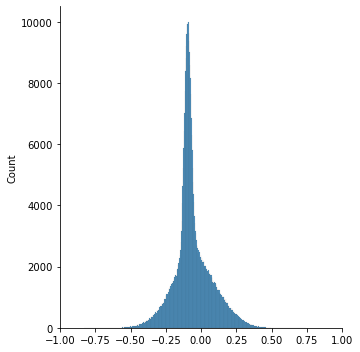

<Figure size 432x288 with 0 Axes>

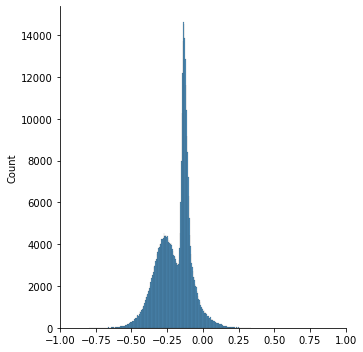

<Figure size 432x288 with 0 Axes>

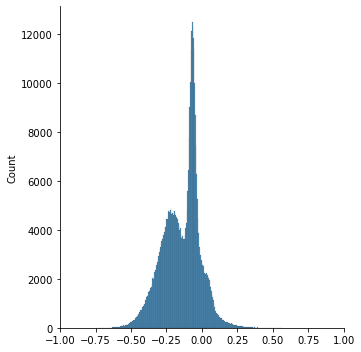

<Figure size 432x288 with 0 Axes>

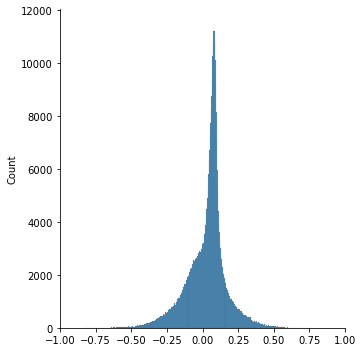

<Figure size 432x288 with 0 Axes>

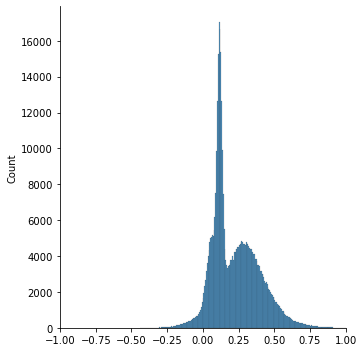

<Figure size 432x288 with 0 Axes>

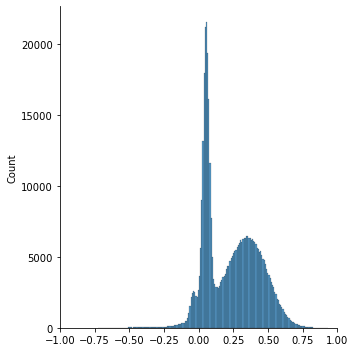

<Figure size 432x288 with 0 Axes>

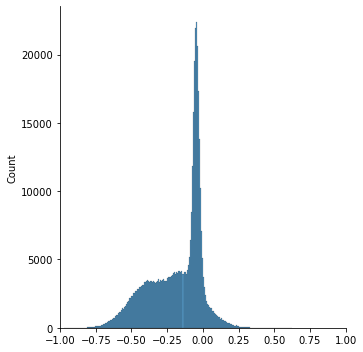

<Figure size 432x288 with 0 Axes>

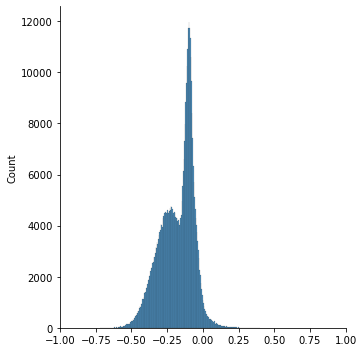

<Figure size 432x288 with 0 Axes>

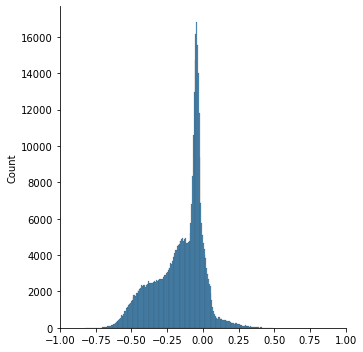

<Figure size 432x288 with 0 Axes>

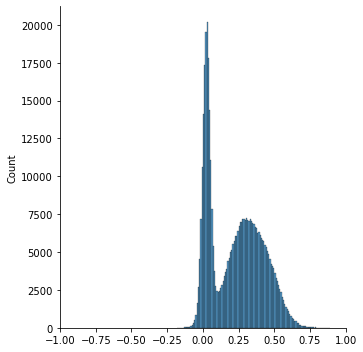

<Figure size 432x288 with 0 Axes>

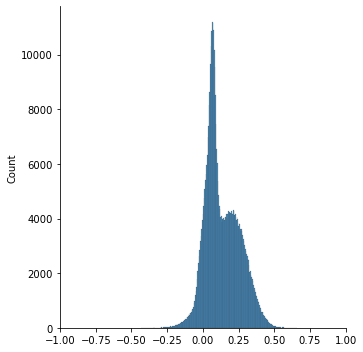

<Figure size 432x288 with 0 Axes>

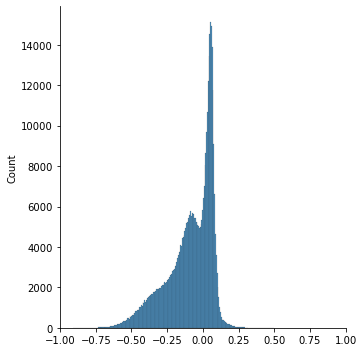

<Figure size 432x288 with 0 Axes>

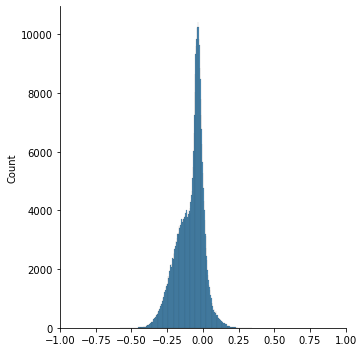

<Figure size 432x288 with 0 Axes>

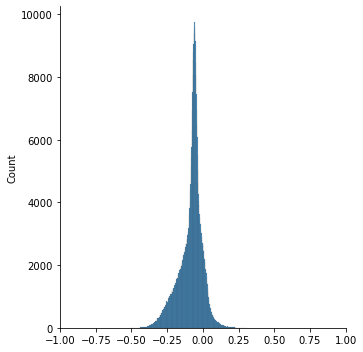

<Figure size 432x288 with 0 Axes>

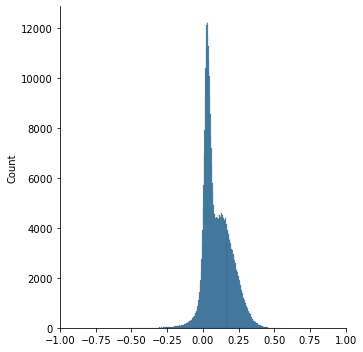

<Figure size 432x288 with 0 Axes>

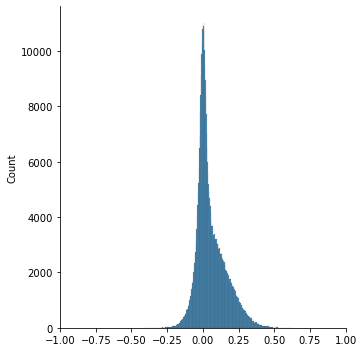

<Figure size 432x288 with 0 Axes>

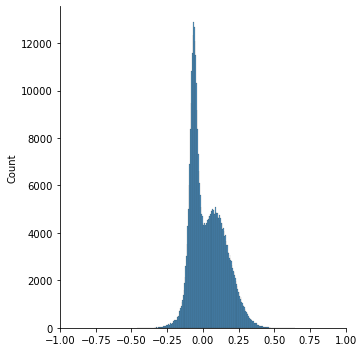

<Figure size 432x288 with 0 Axes>

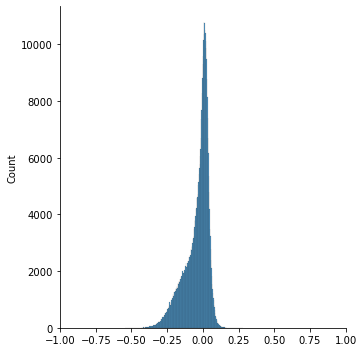

<Figure size 432x288 with 0 Axes>

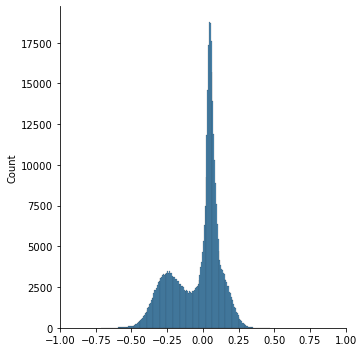

<Figure size 432x288 with 0 Axes>

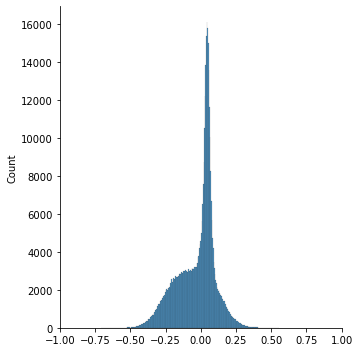

<Figure size 432x288 with 0 Axes>

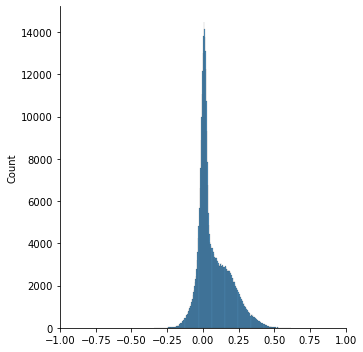

<Figure size 432x288 with 0 Axes>

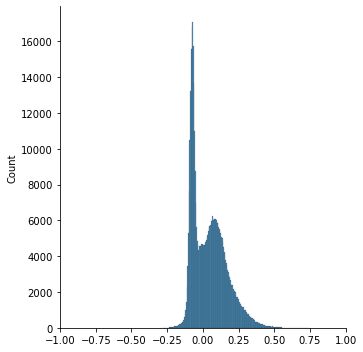

<Figure size 432x288 with 0 Axes>

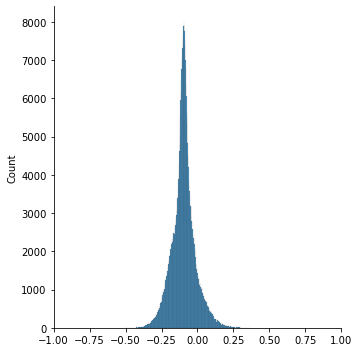

<Figure size 432x288 with 0 Axes>

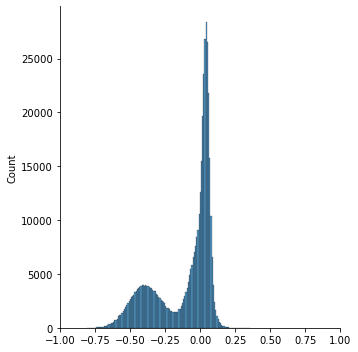

<Figure size 432x288 with 0 Axes>

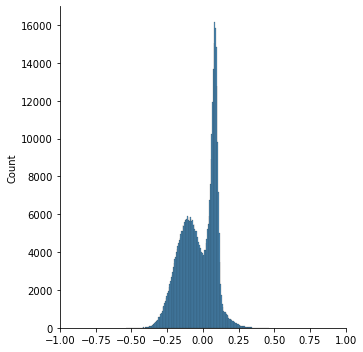

In [17]:
for j in range(y.shape[1]):
    fig = plt.figure()
    sns.displot(y[:,j])
    plt.xlim([-1,1])
    plt.show()

--------------------------

# Section 1
--------------------
## Treat the problem as a regression problem
----------------------

In [7]:
import tensorflow as tf
from tensorflow import keras

import datetime
from tqdm.keras import TqdmCallback

from sklearn.model_selection import train_test_split

from tensorflow.keras.regularizers import l2

In [ ]:
# X = RIS_configs.reshape((100*500, 21))
# y = Transmission.reshape((100*500, 30))
# y = np.hstack([y.real, y.imag])

# y.dtype

In [ ]:
y.shape

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = 1e-7

inp = keras.layers.Input((X_train.shape[1],))
x   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(inp)
x   = keras.layers.Dropout(0.2)(x)
x   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(x)
x   = keras.layers.Dropout(0.2)(x)
x   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(x)
out = keras.layers.Dense(y_train.shape[1], activation='linear')(x)

model = keras.Model(inp, out)



In [18]:
%load_ext tensorboard

In [ ]:
logdir = os.path.join("tensorboard_logs/dnn1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stopping_callbak     = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                        min_delta=0,
                                                        patience=70,
                                                        verbose=1)


In [ ]:
!rm -rf tensorboard_logs/dnn1

In [ ]:
!rm -rf tensorboard_logs/dnn1

#adam = keras.optimizers.Adam()#(lr=10e-3)
model.compile(optimizer='adam', loss='mse')


try:
    
    history = model.fit(X_train, y_train,
              epochs=500,
              batch_size=128,
              validation_data=(X_test, y_test),
              verbose=0,
              callbacks=[TqdmCallback(verbose=0), tensorboard_callback, stopping_callbak],
              )
except KeyboardInterrupt:
    print("Warning: Execution stopped by user.")

In [19]:
%tensorboard --logdir tensorboard_logs/dnn1

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted.shape

In [ ]:
predicted[:10,:]

--------------------

# Section 1.5: Retrain DNN using only RIS profiles

In [13]:
X2_train = X_train.copy()
y2_train = y_train.copy()
X2_test  = X_test.copy()
y2_test  = y_test.copy()


#         X[i*s:(i+1)*s, -4]   = PertOrient.flatten()
#         X[i*s:(i+1)*s, -3]   = L_pert
#         X[i*s:(i+1)*s, -2]   = qq
#         X[i*s:(i+1)*s, -1]   = ll

X2_train[:,[-3,-2,-1]] = 0
X2_test[:,[-3,-2,-1]] = 0
        



print(X2_train.shape)
print(X2_test.shape)




reg = 1e-7
inp2 = keras.layers.Input((X2_train.shape[1],))
x2   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(inp2)
x2   = keras.layers.Dropout(0.2)(x2)
x2   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(x2)
x2   = keras.layers.Dropout(0.2)(x2)
x2   = keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(reg))(x2)
out2 = keras.layers.Dense(y2_train.shape[1], activation='linear')(x2)
model2 = keras.Model(inp2, out2)


logdir = os.path.join("tensorboard_logs/dnn2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stopping_callbak     = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                                        min_delta=0,
                                                        patience=70,
                                                        verbose=1)

model2.compile(optimizer='adam', loss='mse')
try:
    history2 = model2.fit(X2_train, y2_train,
              epochs=500,
              batch_size=128,
              validation_data=(X2_test, y2_test),
              verbose=0,
              callbacks=[TqdmCallback(verbose=0), tensorboard_callback, stopping_callbak],
              )
except KeyboardInterrupt:
    print("Warning: Execution stopped by user.")

(360000, 25)
(90000, 25)


0epoch [00:00, ?epoch/s]

In [8]:
!rm -rf tensorboard_logs/dnn2

In [9]:
%reload_ext tensorboard

In [10]:
%tensorboard --logdir tensorboard_logs/dnn2

Reusing TensorBoard on port 6007 (pid 19403), started 1:46:45 ago. (Use '!kill 19403' to kill it.)

-----------------------

# Section 2

--------------------------

## Train a c-VAE on the same data

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()
tf.python.framework_ops.disable_eager_execution()

batch_size = 50
latent_dim = 7
kl_weight  = .5




inp1   = keras.layers.Input(shape=(X.shape[1],), name='data_input')
labels = keras.layers.Input(shape=(y.shape[1],), name='label_input')
enc_inp = keras.layers.concatenate([inp1, labels], name='encoder_inputs')

x      = keras.layers.Dense(512, activation='relu', name='enclayer1')(enc_inp)
x      = keras.layers.Dropout(0.2)(x)
x      = keras.layers.Dense(512, activation='relu', name='enclayer2')(x)
x      = keras.layers.Dropout(0.2)(x)
x      = keras.layers.Dense(512, activation='relu', name='enclayer3')(x)
x      = keras.layers.Dropout(0.2)(x)
#x      = keras.layers.Dense(512, activation='relu', name='enclayer4')(x)
#x      = keras.layers.Dropout(0.2)(x)


mu        = keras.layers.Dense(latent_dim, activation='linear', name='mu')(x)
log_sigma = keras.layers.Dense(latent_dim, activation='linear', name='sigma')(x)


def sample_z(args):
    mu, log_sigma = args
    eps           = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


#inputs = keras.layers.concatenate([inp1, cond], name='concat_input')


z      = keras.layers.Lambda(sample_z, name='sampling_layer')([mu, log_sigma])
z_cond = keras.layers.concatenate([z, labels], name='decoder_inputs')


x           = keras.layers.Dense(512, activation='relu', name='declayer1')(z_cond)
x           = keras.layers.Dropout(0.2)(x)
x           = keras.layers.Dense(512, activation='relu', name='declayer2')(x)
x           = keras.layers.Dropout(0.2)(x)
x           = keras.layers.Dense(512, activation='relu', name='declayer3')(x)
x           = keras.layers.Dropout(0.2)(x)
#x           = keras.layers.Dense(512, activation='relu', name='declayer4')(x)
#x           = keras.layers.Dropout(0.2)(x)
decoder_out = keras.layers.Dense(X.shape[1], activation='linear', name='output')(x)


def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    # E[log P(X|z,y)]
    recon = K.mean(K.square(y_pred - y_true), axis=-1)
    # D_KL(Q(z|X,y) || P(z|X)); calculate in closed form as both dist. are Gaussian
    kl = kl_weight * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl


encoder = keras.Model([inp1,labels], [mu, log_sigma])
#decoder = keras.Model()

cvae = keras.Model([inp1,labels], decoder_out)



#keras.utils.plot_model(cvae)

In [ ]:
!rm -rf tensorboard_logs/cvae1


logdir = os.path.join("tensorboard_logs/cvae1", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

cvae.compile(optimizer='adam', loss=vae_loss)
cvae_hist = cvae.fit([X_train, y_train],
                     X_train,
                     verbose=0,
                     batch_size=batch_size,
                     epochs=90,
                     validation_data=([X_test, y_test], X_test),
                     callbacks=[TqdmCallback(verbose=0)])

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(cvae_hist.history['loss'])
plt.plot(cvae_hist.history['val_loss'])
#plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

-----------------------------------------

# Section 3

## Train an MDN
-------------------------------------------



In [ ]:
from tensorflow_probability import distributions as tfd

from tensorflow.keras.layers import Input, Dense, Activation, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau


class MDN(tf.keras.Model):

    def __init__(self, neurons=100, components = 2):
        super(MDN, self).__init__(name="MDN")
        self.neurons = neurons
        self.components = components
        
        self.h1 = Dense(neurons, activation="relu", name="h1")
        self.d1 = Dropout(0.3, name='d1')
        self.h2 = Dense(neurons, activation="relu", name="h2")
        self.d2 = Dropout(0.3, name='d2')
        
        self.alphas = Dense(components, activation="softmax", name="alphas")
        self.mus = Dense(components*y_train.shape[1], name="mus")
        self.sigmas = Dense(components, activation="nnelu", name="sigmas")
        self.pvec = Concatenate(name="pvec")
        
    def call(self, inputs):
        x = self.h1(inputs)
        x = self.d1(x)
        x = self.h2(x)
        x = self.d2(x)
        
        alpha_v = self.alphas(x)
        mu_v = self.mus(x)
        sigma_v = self.sigmas(x)
        
        return self.pvec([alpha_v, mu_v, sigma_v])
    
    
def nnelu(input):
    """ Computes the Non-Negative Exponential Linear Unit
    """
    return tf.add(tf.constant(1, dtype=tf.float32), tf.nn.elu(input))

def slice_parameter_vectors(parameter_vector):
    """ Returns an unpacked list of paramter vectors.
    """
    l = [parameter_vector[:,i*components:(i+1)*components] for i in range(no_parameters)]
    
    for item in l:
        print(item.shape)
        
    mu = parameter_vector[1]
    mu = tf.reshape(mu, (components, y_train.shape[1]))
    l[1] = mu
    return l

def gnll_loss(y, parameter_vector):
    """ Computes the mean negative log-likelihood loss of y given the mixture parameters.
    """
    alpha, mu, sigma = slice_parameter_vectors(parameter_vector) # Unpack parameter vectors
    
    gm = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(probs=alpha),
        components_distribution=tfd.Normal(
            loc=mu,       
            scale=sigma))
    
    log_likelihood = gm.log_prob(tf.transpose(y)) # Evaluate log-probability of y
    
    return -tf.reduce_mean(log_likelihood, axis=-1)

tf.keras.utils.get_custom_objects().update({'nnelu': Activation(nnelu)})

In [ ]:
no_parameters = 3
components = 5

mdn = MDN(neurons=64, components=components)
mdn.compile(loss=gnll_loss, optimizer=tf.optimizers.Adam(learning_rate=10e-4))

mdn_history = mdn.fit(X_train[:500],
                      y_train[:500],
                      epochs=60,
                      verbose=0,
                      batch_size=128,
                      validation_data=(X_test, y_test),
                      callbacks=[TqdmCallback(verbose=0)]
                 )

In [ ]:
plt.plot(mdn_history.history['loss'][7:])
plt.plot(mdn_history.history['val_loss'][7:])
#plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def predict_strongest_component(mdn_model, X):
    y_pred                          = mdn_model.predict(X)
    alpha_pred, mu_pred, sigma_pred = slice_parameter_vectors(y_pred)
    strongest_components            = np.argmax(alpha_pred, axis=1)
    #predictions                     = mu_pred[np.arange(X.shape[0]),strongest_components]
    predictions = np.empty((X.shape[0], sigma_pred.shape[1]))
    #for i in range
    print(sigma_pred.shape)
    
    return predictions
    


In [ ]:
y_pred_test = predict_strongest_component(mdn, X_test)
y_pred_test.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import mean_squared_error


mdn_mse = mean_squared_error(y_test, y_pred_test)
mdn_mse